<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/EDA-airbnb/blob/main/Ali_Asgar_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for <u>security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.</u> </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?
 </b>

In [1]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
pd.get_option("display.max_rows")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
sns.set(rc={'figure.figsize':(16.7,8.27)})
plt.rcParams['figure.figsize'] = [16.7,8.27]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
working_directory = '/content/drive/MyDrive/Colab Notebooks/Capstone EDA/Copy of Airbnb NYC 2019.csv'
df = pd.read_csv(working_directory)
sns.set(rc={'figure.figsize':(16.7,8.27)})
plt.rcParams['figure.figsize'] = [16.7,8.27]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Handling missing,duplicate and bogus values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df_with_na=df
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
# df['last_review'] = df['last_review'].fillna(0)
df['host_name'] = df['host_name'].replace(np.nan, 'apsent')
df['name'] = df['name'].replace(np.nan, 'apsent')
# df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
df=df.loc[df['price']>0]
df=df.loc[df['availability_365']>0]

In [7]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [8]:
type(df.last_review[1])

str

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31354 non-null  int64  
 1   name                            31354 non-null  object 
 2   host_id                         31354 non-null  int64  
 3   host_name                       31354 non-null  object 
 4   neighbourhood_group             31354 non-null  object 
 5   neighbourhood                   31354 non-null  object 
 6   latitude                        31354 non-null  float64
 7   longitude                       31354 non-null  float64
 8   room_type                       31354 non-null  object 
 9   price                           31354 non-null  int64  
 10  minimum_nights                  31354 non-null  int64  
 11  number_of_reviews               31354 non-null  int64  
 12  last_review                     

In [10]:
#converting date str to date time object
df['last_review']=pd.to_datetime(df['last_review'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              31354 non-null  int64         
 1   name                            31354 non-null  object        
 2   host_id                         31354 non-null  int64         
 3   host_name                       31354 non-null  object        
 4   neighbourhood_group             31354 non-null  object        
 5   neighbourhood                   31354 non-null  object        
 6   latitude                        31354 non-null  float64       
 7   longitude                       31354 non-null  float64       
 8   room_type                       31354 non-null  object        
 9   price                           31354 non-null  int64         
 10  minimum_nights                  31354 non-null  int64         
 11  nu

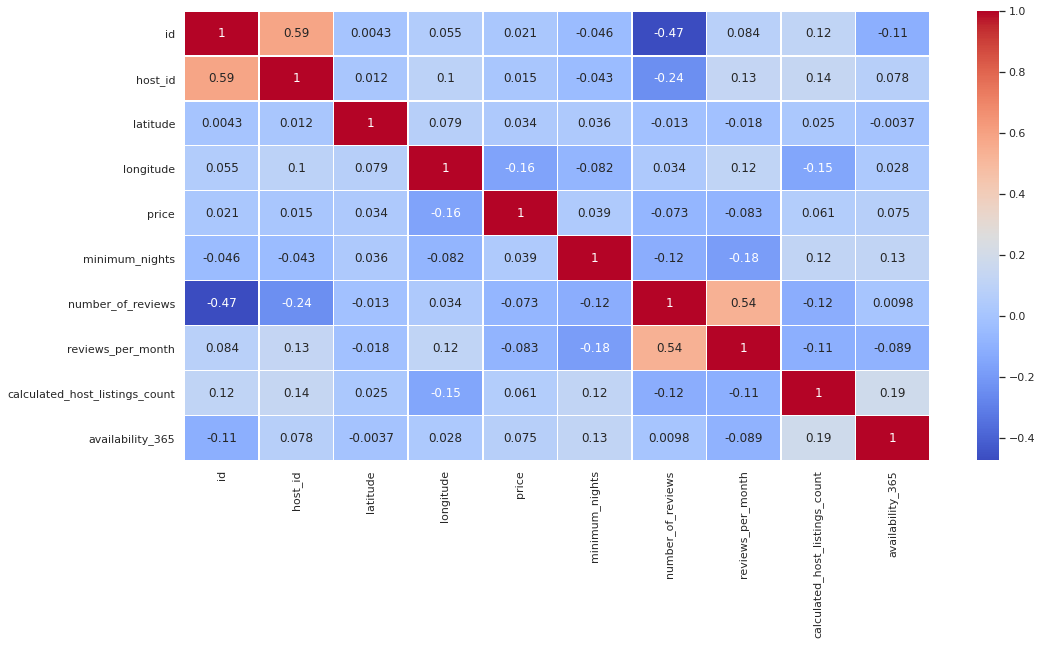

In [12]:
# generating heat map and finding the realation between the collumns
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm',linewidths=.5)

# Column NO. 1 : name

In [13]:
df.name

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
5                Large Cozy 1 BR Apartment In Midtown East
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 31354, dtype: object

This columns contains the name(discription) of the property which the host is giving on rent by which he can draw the customers attention

# Column NO. 2 & 3 : host_id, host_name 



In [14]:
df.host_id

0            2787
1            2845
2            4632
3            4869
5            7322
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 31354, dtype: int64

In [15]:
df.host_id.nunique()

21808

This column contains all the unique id of hosts there are a total of 18911 hosts in the database

In [16]:
df.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
5                Chris
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 31354, dtype: object

In [17]:
df.host_name.nunique()

8214



1.   This column contains all the unique name of hosts there are a total of 7355 diffrent hosts name in the database.
2.   By comparing the unique numbers of host and host id it can be concluded that there are many host with same name.
3.   So we will use host id for all further analysis  



# Column NO. 4 : neighbourhood_group

In [18]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'neighbourhood group and thier value count')

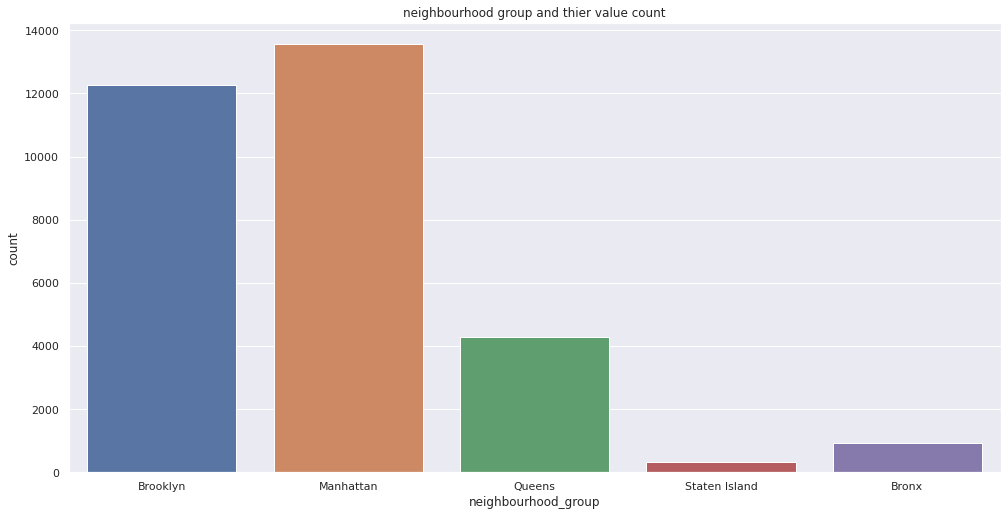

In [19]:
sns.countplot(df.neighbourhood_group).set_title('neighbourhood group and thier value count')

By this graph we can see that most booking are in manhattan and brooklyn

Text(0.5, 1.0, 'city room type value count')

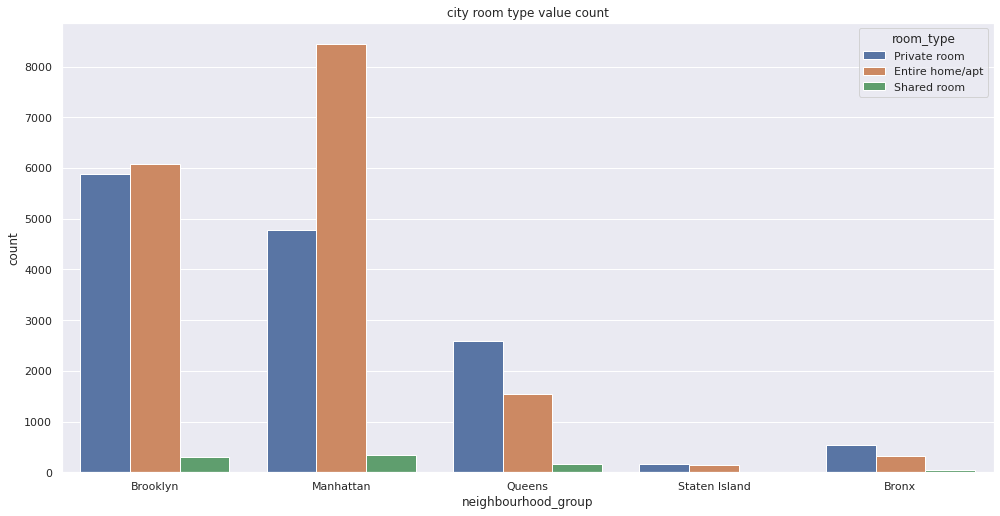

In [20]:
sns.countplot(data=df,x='neighbourhood_group',hue='room_type').set_title('city room type value count')

this graph shows the number of hoses with their types in respective areas

by this graph we can conclude that in manhattan people prefer to book entire home rather than private room nad in brooklyn both have aprox equal no of count while people donot prefer shared room in either of the city 

# Column NO. 5 : neighbourhood

In [21]:
df.neighbourhood.value_counts()

Bedford-Stuyvesant    2478
Williamsburg          2051
Harlem                1734
Bushwick              1447
Hell's Kitchen        1446
                      ... 
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
Rossville                1
Silver Lake              1
Name: neighbourhood, Length: 218, dtype: int64

their are a total of 217 neighbourhood area under neighbourhood_group

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

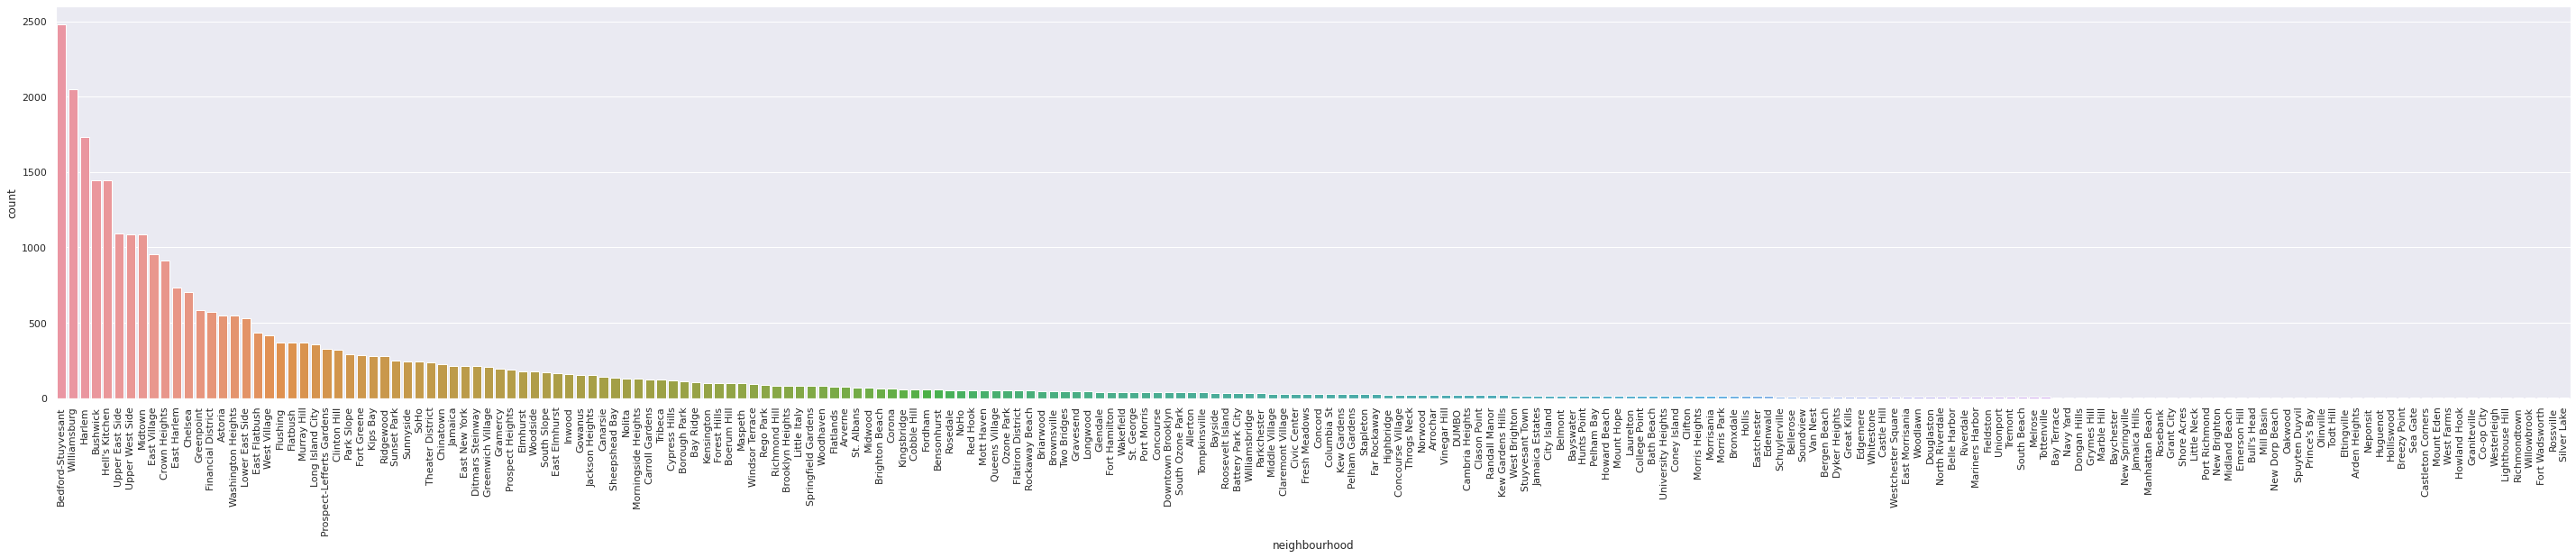

In [22]:
plt.figure(figsize=(50,8))
sns.countplot(df.neighbourhood,order = df.neighbourhood.value_counts().index )
plt.xticks(rotation=90)


In [23]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [24]:
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']
Queens_group_df=df.loc[df['neighbourhood_group']== 'Queens']
Staten_Island_group_df=df.loc[df['neighbourhood_group']== 'Staten Island']
Bronx_group_df=df.loc[df['neighbourhood_group']== 'Bronx']



Text(0.5, 1.0, 'top 10 brooklyn neighbourhood value count')

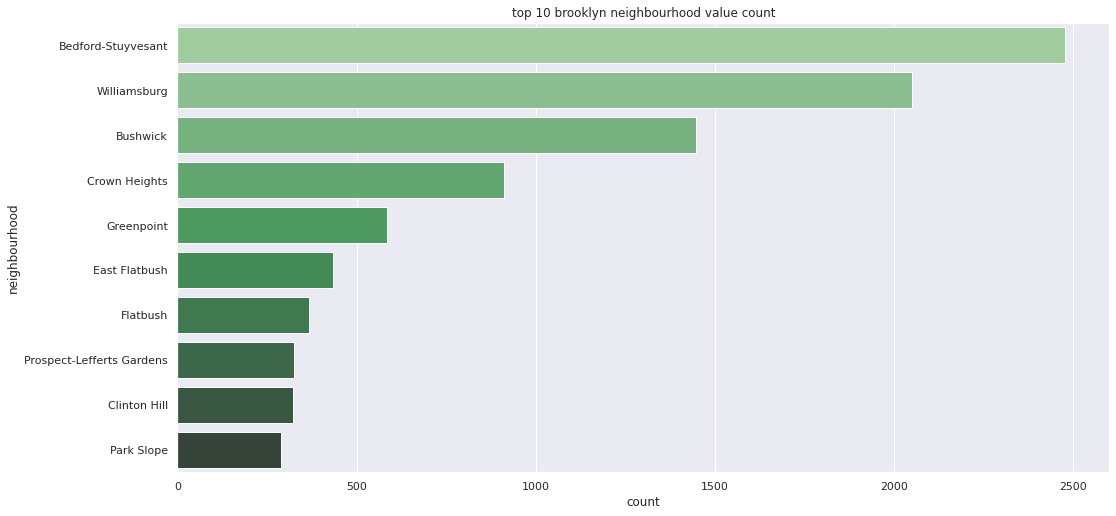

In [25]:
# top 10 areas in brooklyn with most booking
sns.countplot(y="neighbourhood", data=brooklyn_group_df, palette="Greens_d",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')

Text(0.5, 1.0, 'top 10 manhattan neighbourhood value count')

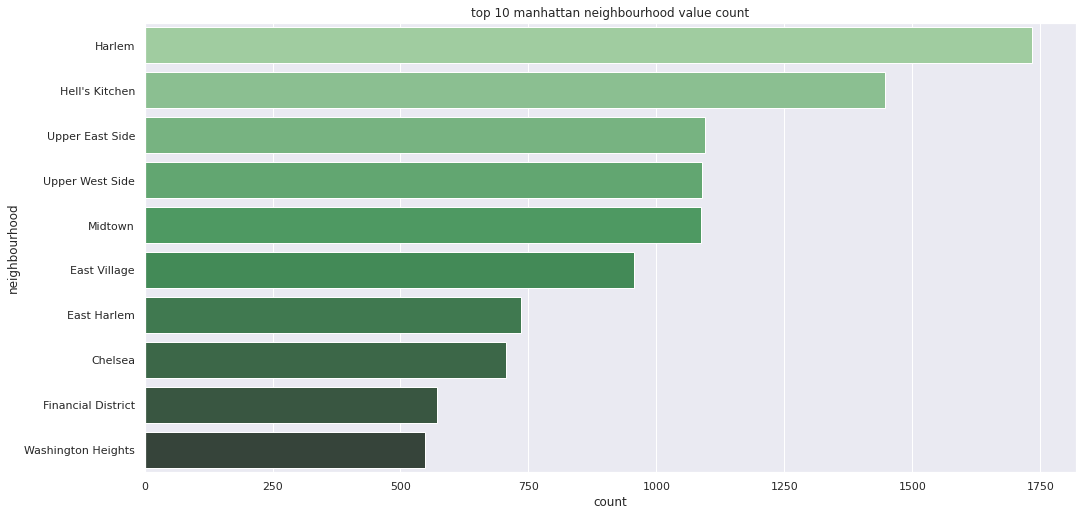

In [26]:
# top 10 areas in manhattan with most booking
sns.countplot(y="neighbourhood", data=manhattan_group_df, palette="Greens_d",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')


Text(0.5, 1.0, 'top 10 Queens neighbourhood value count')

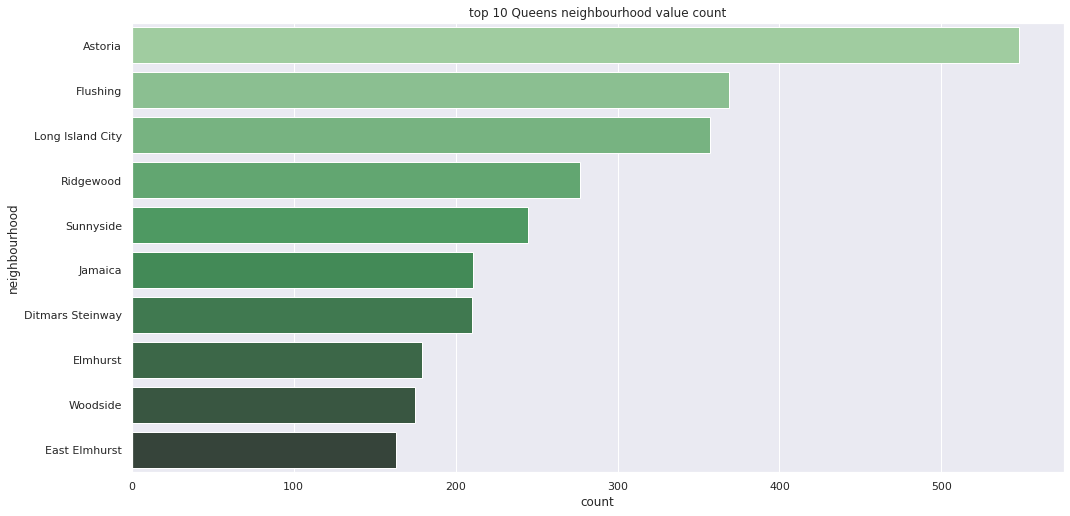

In [27]:
# top 10 areas in Queens with most booking
sns.countplot(y="neighbourhood", data=Queens_group_df, palette="Greens_d",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')

Text(0.5, 1.0, 'top 10 Staten_Island neighbourhood value count')

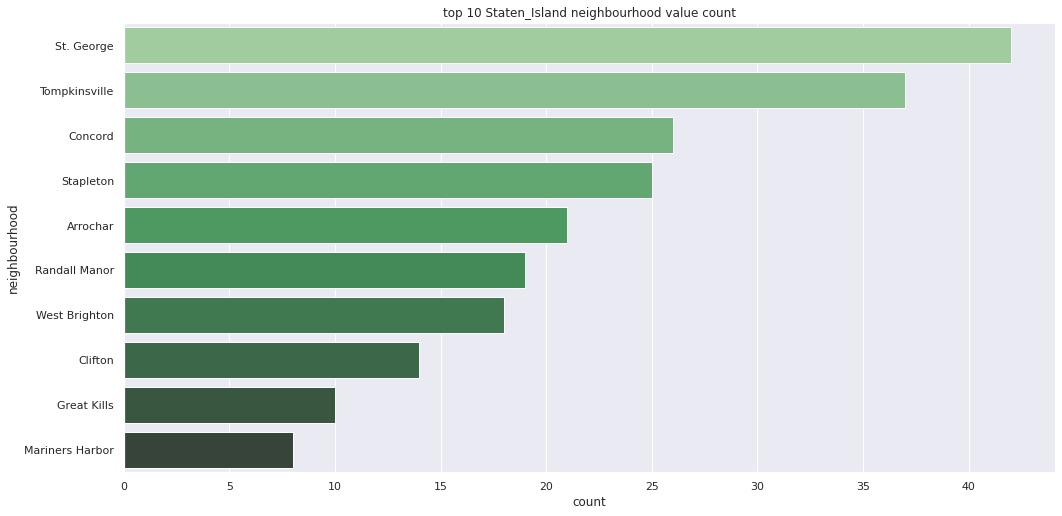

In [28]:
# top 10 areas in Staten_Island with most booking
sns.countplot(y="neighbourhood", data=Staten_Island_group_df, palette="Greens_d",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

Text(0.5, 1.0, 'top 10 Bronx neighbourhood value count')

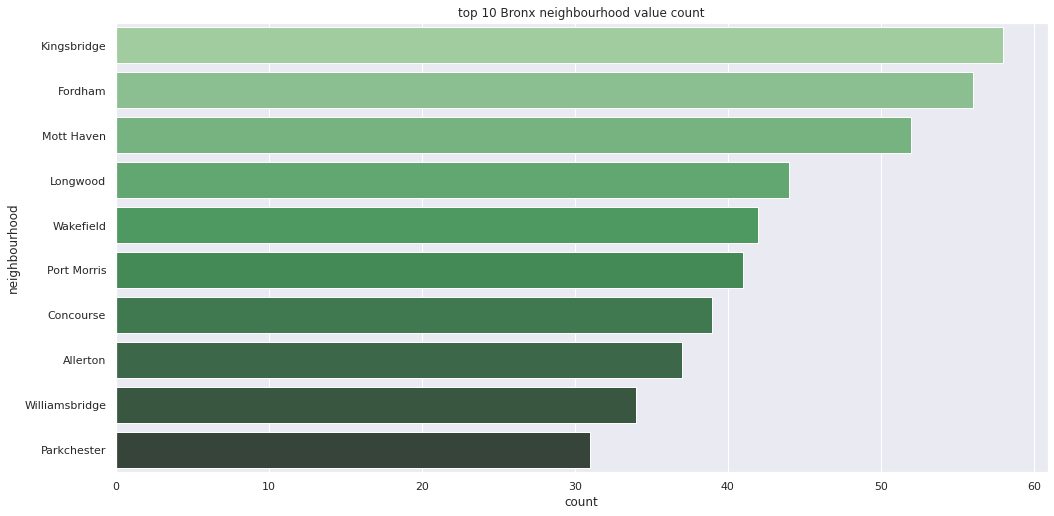

In [29]:
# top 10 areas in Staten_Island with most booking
sns.countplot(y="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')

Text(0.5, 1.0, 'top 10 Bronx neighbourhood value count')

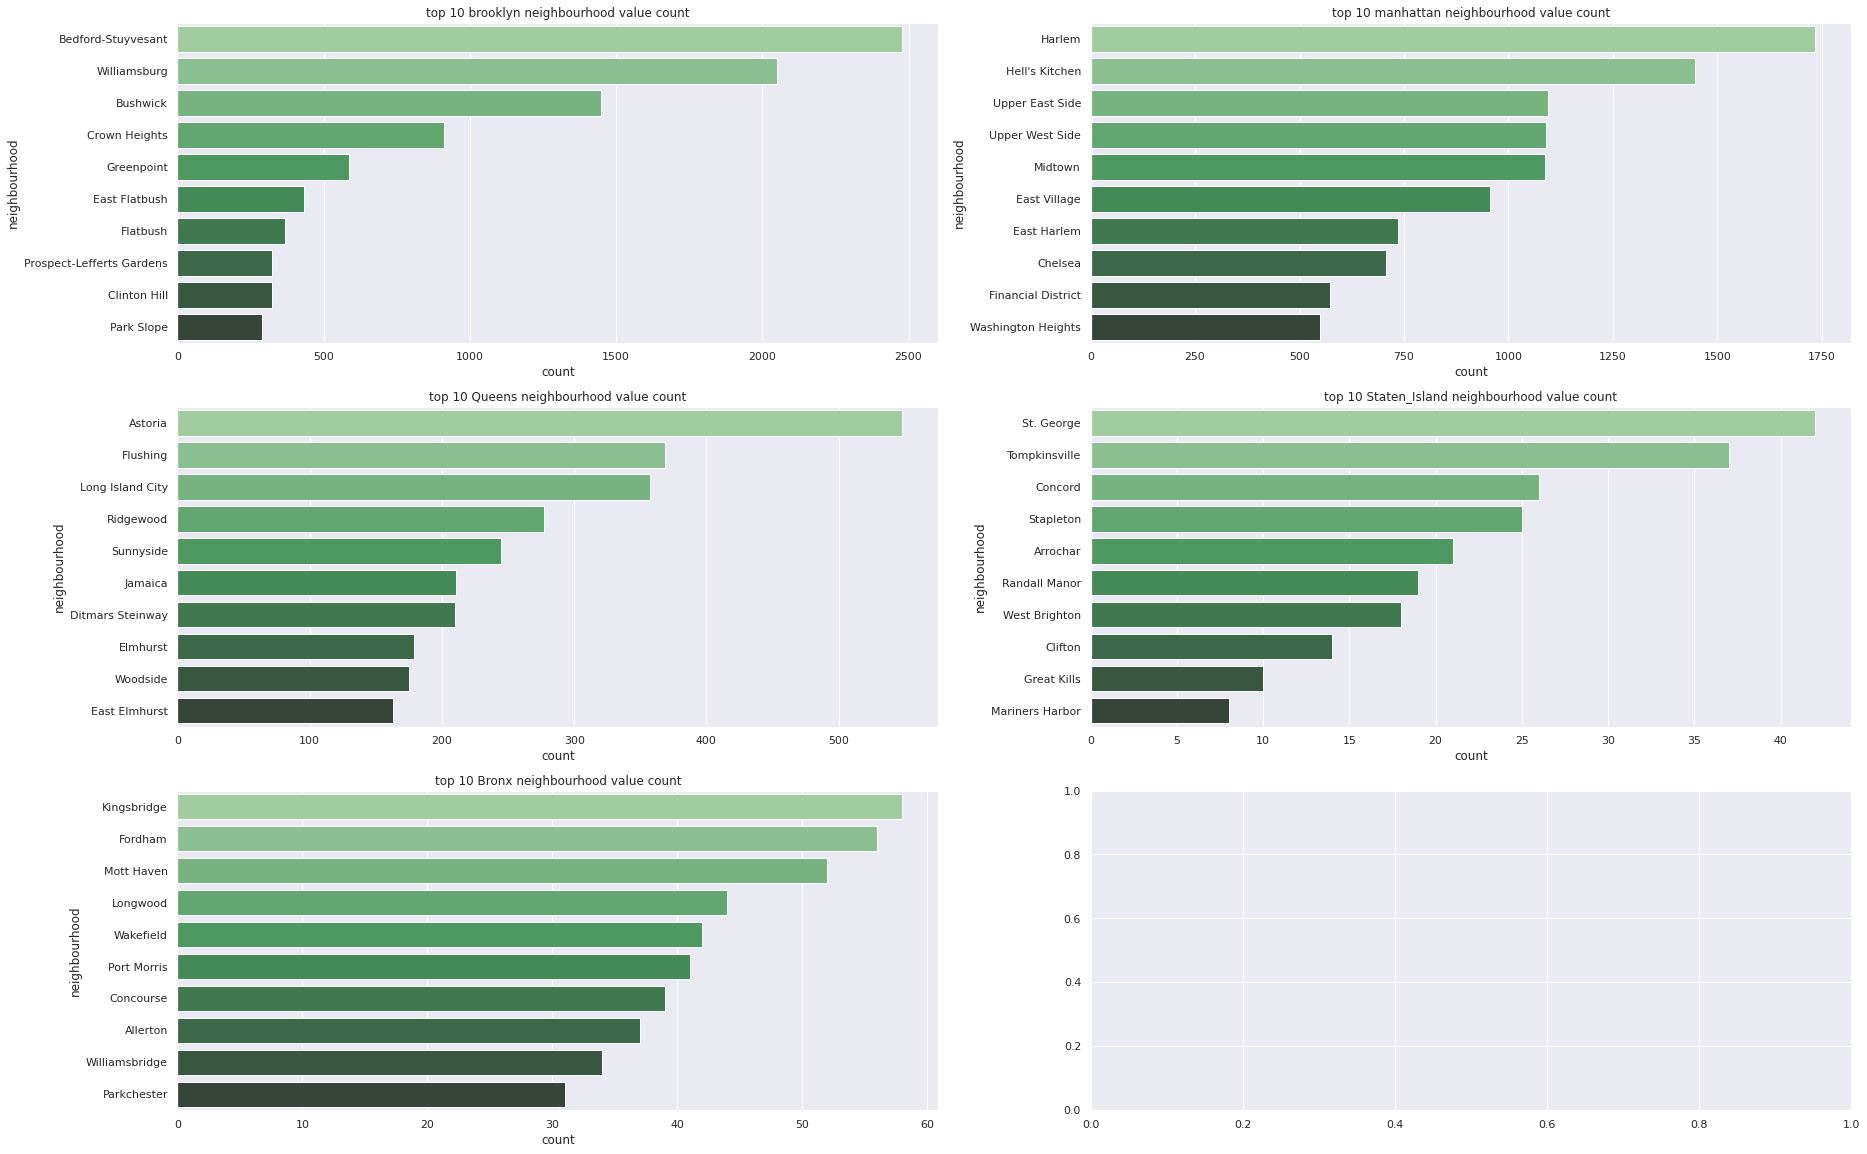

In [30]:
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],y="neighbourhood", data=brooklyn_group_df, palette="Greens_d",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')
sns.countplot(ax=axes[0,1],y="neighbourhood", data=manhattan_group_df, palette="Greens_d",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')
sns.countplot(ax=axes[1,0],y="neighbourhood", data=Queens_group_df, palette="Greens_d",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')
sns.countplot(ax=axes[1,1],y="neighbourhood", data=Staten_Island_group_df, palette="Greens_d",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')
sns.countplot(ax=axes[2,0],y="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')

from the above graphs we can say that
1. willamsburg, bedford and bushwick have most no of bookings in brooklyn neighbourhood_group
2. Harlem, Upper West Side and Hell's Kitchen have most no of bookings in manhattan neighbourhood_group
3. astoria, flushing and long island city  have most no of bookings in Queens neighbourhood_group
4. tompkinsville, St.George, cancaord ave most no of bookings in Staten_Island neighbourhood_group
5. in this neighbourhood_group all the neighbourhood have almost equal no of bookings

# Column NO. 6 & 7 : latitude & longitude

In [31]:
df.latitude.describe()

count    31354.000000
mean        40.728406
std          0.056562
min         40.499790
25%         40.688393
50%         40.723725
75%         40.763038
max         40.913060
Name: latitude, dtype: float64

In [32]:
df.longitude.describe()

count    31354.000000
mean       -73.948753
std          0.051400
min        -74.244420
25%        -73.983280
50%        -73.954115
75%        -73.930152
max        -73.712990
Name: longitude, dtype: float64

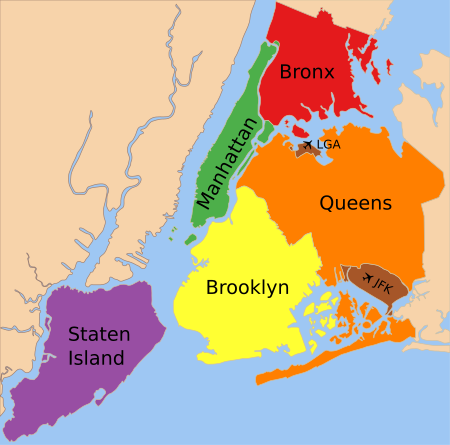

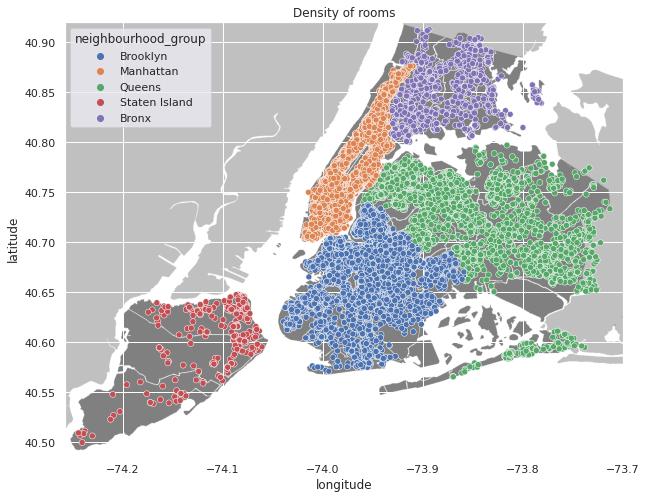

In [33]:
data = df[["latitude","longitude",'neighbourhood_group']]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
sns.scatterplot(data = data,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of rooms')
plt.show()

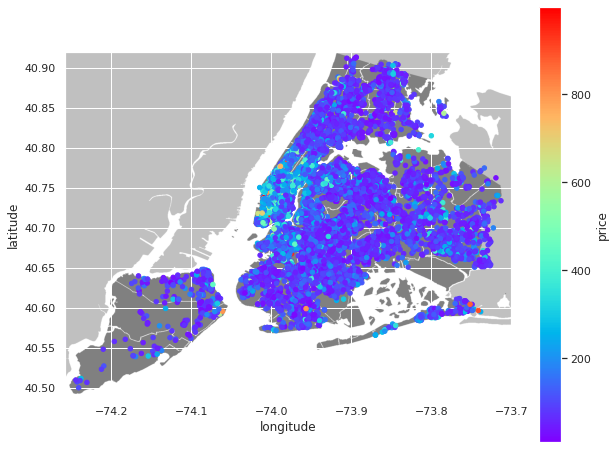

In [34]:
data = df[["latitude","longitude","price"]]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488,40.92])
ax=plt.gca()
data=data[data['price']<1000]
data.plot(kind = "scatter", x = "longitude", y = "latitude",ax=ax,figsize = (10,8), c = "price", cmap = plt.get_cmap("rainbow"),colorbar = True)


by the above scater plot we can see that manhattan has most numbers of houses which have price above 200

# Column NO. 8 : Room Type

Text(0.5, 1.0, 'Room type and their value count')

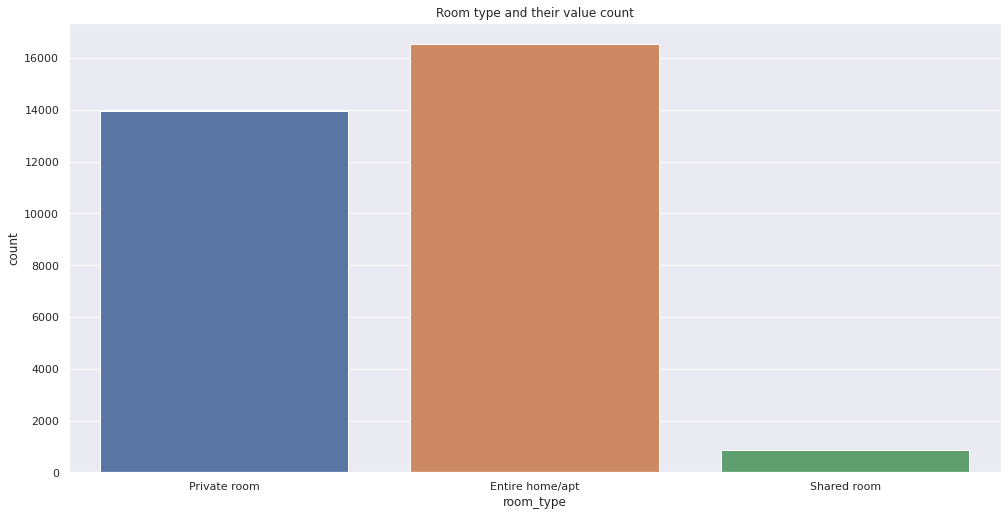

In [35]:
sns.countplot(x=df['room_type']).set_title('Room type and their value count')

by this graph we can conclude that people prefer booking entire home/apt or private room very few people prefere to have shared rooms.

# Column NO. 9 : price

In [36]:
city_room_type_df=df.groupby(['neighbourhood_group','room_type']).agg({'price':'median'}).sort_values('price',ascending=False).reset_index()

Text(0.5, 1.0, 'median price of room type in each city')

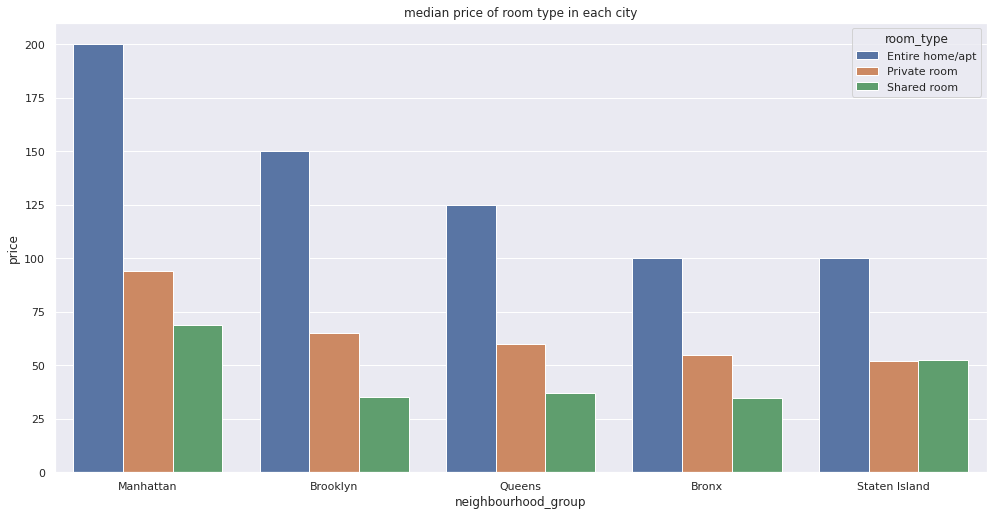

In [37]:
sns.barplot(data=city_room_type_df,x='neighbourhood_group',hue='room_type',y='price').set_title('median price of room type in each city')

Among all the cities manhattan houses are most expensive for all the room types

Text(0.5, 1.0, 'Count of houses based on rate')

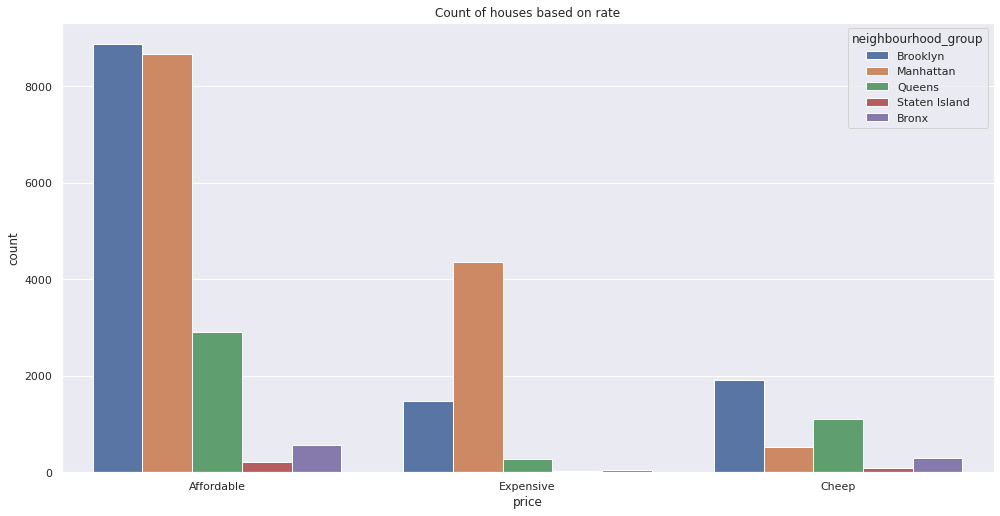

In [38]:
'''
dividing price range in 3 groups 
1) cheep i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep'
  elif price>=50 and price<=200:
    return 'Affordable'
  else:
    return 'Expensive'

sns.countplot(x=df.price.apply(price_catagory), hue=df.neighbourhood_group).set_title('Count of houses based on rate')

by the above graph we can conclude that people prefer the romms in range of 50 to 200

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

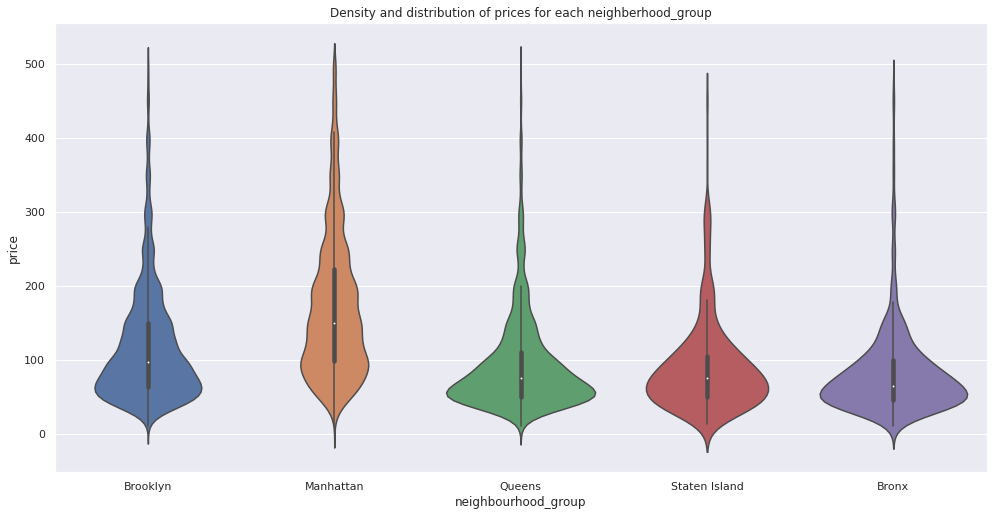

In [39]:
#creating a sub-dataframe with  extreme values  less than 500
sub_df=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
sns.violinplot(data=sub_df, x='neighbourhood_group', y='price').set_title('Density and distribution of prices for each neighberhood_group')


by this violin plot we can observe the distribution of prices. we can state that Manhattan has the highest range of prices with average of 150, Brooklyn with 90. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest.by this we cann conclude that Manhattan is one of the most expensive place followed by brooklyn and queens

# Column NO. 10 : minimum_nights

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 <a list of 99 Text major ticklabel objects>)

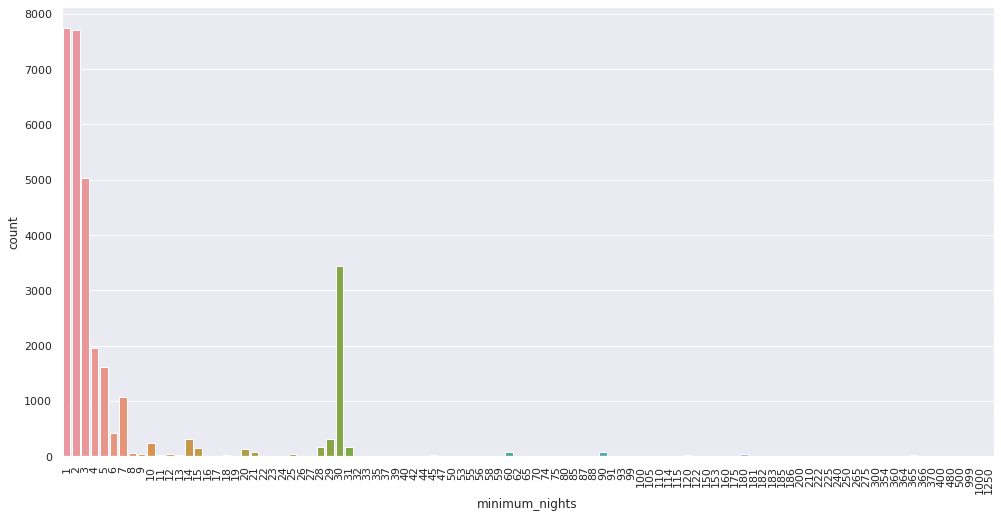

In [40]:
sns.countplot(df.minimum_nights)
plt.xticks(rotation=90)

This plots shows that majority of room booking are for 1 to 4 and then for 30 days

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


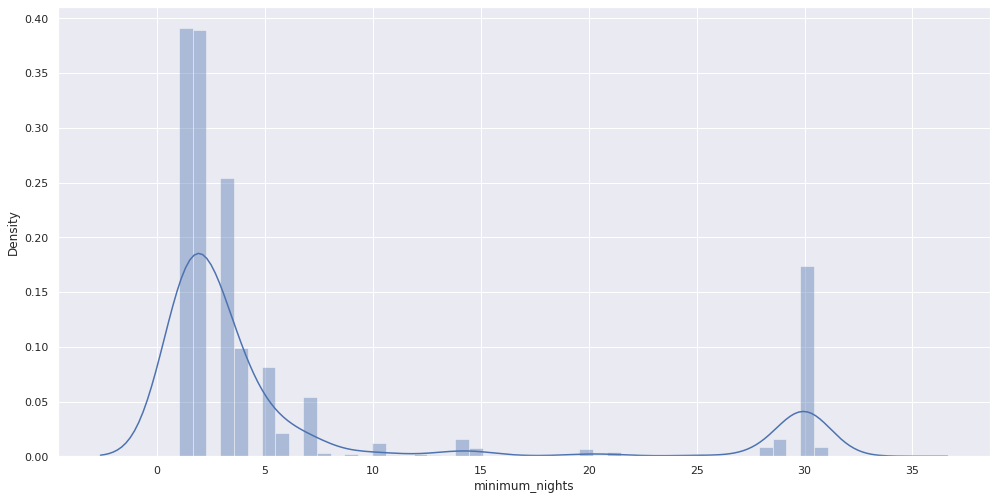

In [41]:
# reamoving the values after 100 we get
min_nights_df=df[df.minimum_nights<35]
sns.distplot(min_nights_df.minimum_nights)

by the above graph we can say that is is a right screwed (positive skewness)

# Column NO. 11 : number_of_reviews


In [42]:
df.number_of_reviews.describe()

count    31354.000000
mean        31.849365
std         51.638559
min          0.000000
25%          2.000000
50%         10.000000
75%         39.000000
max        629.000000
Name: number_of_reviews, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

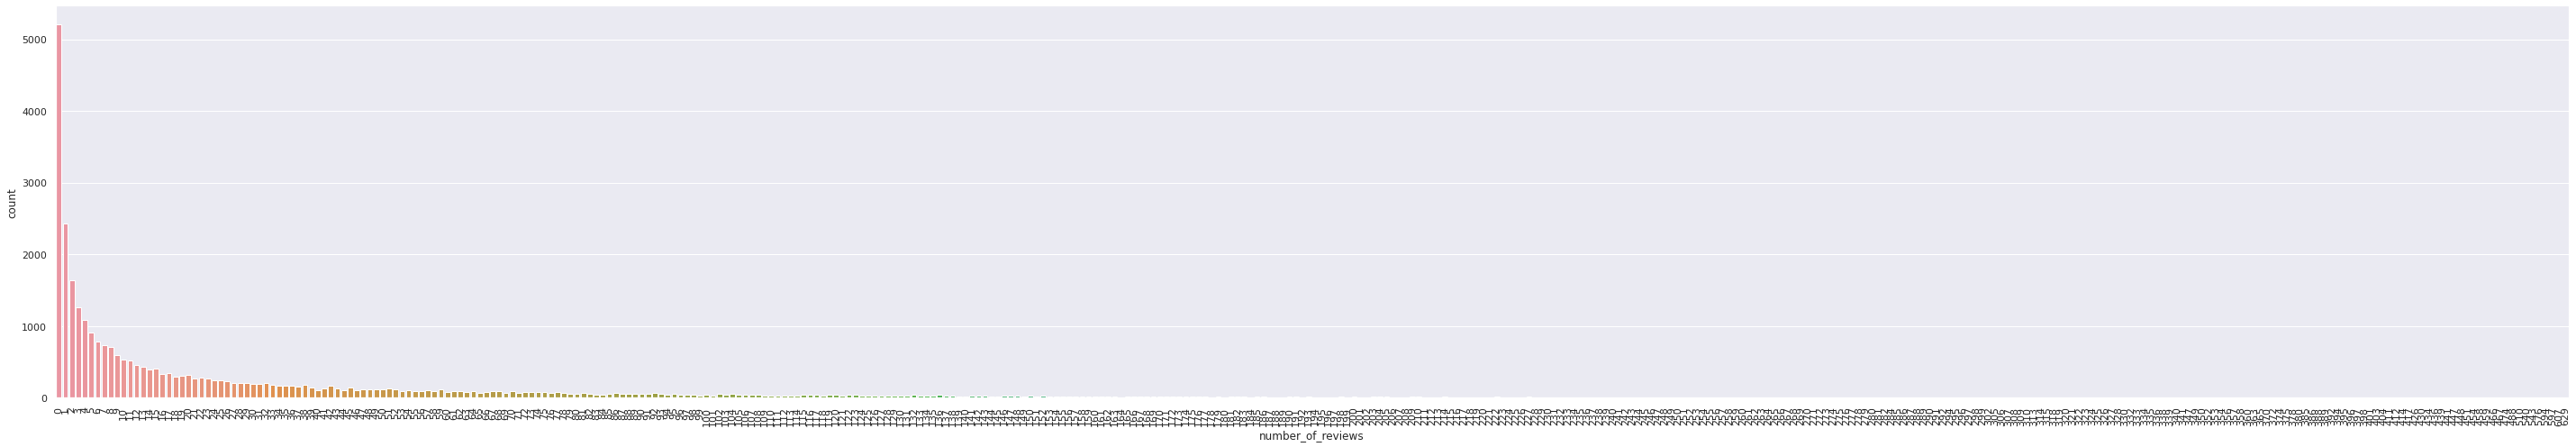

In [43]:
plt.figure(figsize=(50,8))
sns.countplot(df.number_of_reviews)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


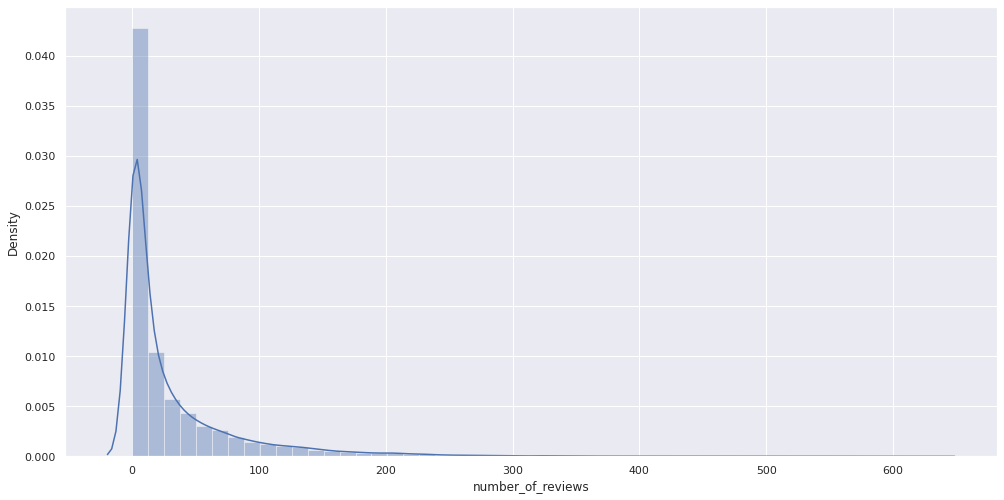

In [44]:
sns.distplot(df.number_of_reviews)

This column tells us about the number of reviews an appatment has got so far
where the min value is 0 its cause can be
1. no one has visited this place
2. no one has reviewed
3. the values are missing


also it has a mean of 32,median of 10 and max of 629 rating


by the above graph we can say that is is a right screwed (positive skewness) with very few homes rated above 200

# Column NO. 12 : last_review


In [45]:
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
5       2019-06-22
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 31354, dtype: datetime64[ns]

In [46]:
least_recent_date = df['last_review'].min()
most_recent_date = df['last_review'].max()
print(f'the least recent date is {least_recent_date.date()} and the most recent date is {most_recent_date.date()} in last review')

the least recent date is 2011-04-25 and the most recent date is 2019-07-08 in last review


In [52]:
df[df.last_review < '2015-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 102 to 5840
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              94 non-null     int64         
 1   name                            94 non-null     object        
 2   host_id                         94 non-null     int64         
 3   host_name                       94 non-null     object        
 4   neighbourhood_group             94 non-null     object        
 5   neighbourhood                   94 non-null     object        
 6   latitude                        94 non-null     float64       
 7   longitude                       94 non-null     float64       
 8   room_type                       94 non-null     object        
 9   price                           94 non-null     int64         
 10  minimum_nights                  94 non-null     int64         
 11  numb

In [61]:
df[df.last_review.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5207 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5207 non-null   int64         
 1   name                            5207 non-null   object        
 2   host_id                         5207 non-null   int64         
 3   host_name                       5207 non-null   object        
 4   neighbourhood_group             5207 non-null   object        
 5   neighbourhood                   5207 non-null   object        
 6   latitude                        5207 non-null   float64       
 7   longitude                       5207 non-null   float64       
 8   room_type                       5207 non-null   object        
 9   price                           5207 non-null   int64         
 10  minimum_nights                  5207 non-null   int64         
 11  num

This column tells us about the when an appartment got his last review an appatment where their are some missing values its reason can be that
1. no one has visited this place
2. no one has reviewed
3. the values are missing

The least_recent_date is 1970-01-01 and the most_recent_date is 2019-07-08 in last review

we can conclude that these appartment may have been closed or not avalable as no one has reviewed since 50 years 

thier are a total of 94 appartment which havent been reviewed in last 5 years and 5207 apsent data

# Column NO. 13 : reviews_per_month

In [ ]:
df['total_profit']=df['reviews_per_month']*df['price']

In [ ]:
#extracting list of top 10 most busy host by sum of reviews per month
top_10_review_host_list=df.groupby(['host_id']).agg({'reviews_per_month':'sum'}).sort_values('reviews_per_month',ascending=False).reset_index()[:10]['host_id'].tolist()
# making a df for top 10 hosts 
top_10_review_host=df[df.host_id.isin(top_10_review_host_list)]
#grouping the values by host name and taking total of reviews per month
temp_top_10_review_host=top_10_review_host.groupby('host_name').agg({'reviews_per_month':'sum'}).reset_index().rename(columns={'reviews_per_month':'total_reviews_per_month'})
#ploting a graph of host name vs total reviews per month

# sns.barplot(y="host_name", x='total_reviews_per_month' ,data=temp_top_10_review_host).set_title('top 10 host by total rewiew')


In [ ]:
# extracting list of top 10 most busy host by value count
top_10_valuecount_host_list=df['host_id'].value_counts().reset_index()[:10]['index'].tolist()
top_10_valuecount_host=df[df.host_id.isin(top_10_valuecount_host_list)]
# sns.countplot(y="host_name", data=top_10_valuecount_host).set_title('top 10 host by no of homes')

In [ ]:
top_10_profit_host_list=df.groupby('host_id').agg({'total_profit':'sum'}).reset_index().sort_values(['total_profit'],ascending=False)[:10].reset_index()['host_id'].tolist()
top_10_profit_host_df=df[df.host_id.isin(top_10_profit_host_list)]
temp_top_10_profit_host_df=top_10_profit_host_df.groupby('host_name').agg({'total_profit':'sum'}).reset_index().rename(columns={'total_profit':'total_profit_sum'})
# sns.barplot(y='host_name',x='total_profit_sum',data=temp_top_10_profit_host_df).set_title('top 10 hosts by total profit')

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(10, 24))
sns.barplot(ax=axes[0],y="host_name", x='total_reviews_per_month' ,data=temp_top_10_review_host).set_title('top 10 host by total rewiew')
sns.countplot(ax=axes[1],y="host_name", data=top_10_valuecount_host).set_title('top 10 host by no of homes')
sns.barplot(ax=axes[2],y='host_name',x='total_profit_sum',data=temp_top_10_profit_host_df).set_title('top 10 hosts by total profit')

this graph shows the total profit of top 10 hosts based on the revies per month and price

In [ ]:
# top_10_profit_host_df   top_10_valuecount_host    top_10_review_host

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('value count of host houses in city')
sns.countplot(ax=axes[0],data=top_10_profit_host_df,x='neighbourhood_group',hue='host_name').set_title('top_10_profit_host')
sns.countplot(ax=axes[1],data=top_10_valuecount_host,x='neighbourhood_group',hue='host_name').set_title('top_10_valuecount_host')
sns.countplot(ax=axes[2],data=top_10_review_host,x='neighbourhood_group',hue='host_name').set_title('top_10_review_host') 

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,8))
fig.suptitle('room type in each city')
sns.countplot(ax=axes[0],data=top_10_profit_host_df,x='neighbourhood_group',hue='room_type').set_title('top_10_profit_host')
sns.countplot(ax=axes[1],data=top_10_valuecount_host,x='neighbourhood_group',hue='room_type').set_title('top_10_valuecount_host')
sns.countplot(ax=axes[2],data=top_10_review_host,x='neighbourhood_group',hue='room_type').set_title('top_10_review_host')

this graph shows that where top 10 hosts houses are located looks like they all love manhattan the most 

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,8))
fig.suptitle('price of room type in each city')
sns.boxplot(ax=axes[0],y='price',x='room_type',data=top_10_profit_host_df).set_title('top_10_profit_host')
sns.boxplot(ax=axes[1],y='price',x='room_type',data=top_10_valuecount_host).set_title('top_10_valuecount_host')
sns.boxplot(ax=axes[2],y='price',x='room_type',data=top_10_review_host).set_title('top_10_review_host')




to gain max profit avg price should be greater than 200 and to earn max reviews your prices should be less than 250

In [ ]:
# top 20 minimum_nights which gain max profit 
profit_min_nights=df.groupby('minimum_nights').agg({'total_profit':'sum'}).reset_index().sort_values(['total_profit'],ascending=False)[:20]

In [ ]:
sns.barplot(x='minimum_nights',y='total_profit',data=profit_min_nights).set_title('top 20 total profit sum vs prescribe min nights')

In [ ]:
df.head(1)

In [ ]:
# top 20 minimum_nights which gain reviews
review_min_nights=df.groupby('minimum_nights').agg({'reviews_per_month':'sum'}).reset_index().sort_values(['reviews_per_month'],ascending=False)[:20]

In [ ]:
sns.barplot(x='minimum_nights',y='reviews_per_month',data=review_min_nights).set_title('top 20 total review per month sum vs prescribe min nights')

In [ ]:
#pie chart for top 20 min nights with their reviews_per_month 
review_min_nights.plot.pie(y='reviews_per_month',autopct="%.1f%%",labels=profit_min_nights['minimum_nights'].tolist())
plt.title("min nights with review per month total ", fontsize=14)

by the above graph we can conclude that the rooms with min number of days betweent 1 and 3 earn max reviews